<a href="https://colab.research.google.com/github/tugcegulsanusta/machine-learning-project/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Explore data



In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head()


Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#count NaN
df.isna().sum()

# Clear data

In [ ]:
df = df.dropna(axis = 1)
df = df.drop('id', axis= 1)
df.shape
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#count the class results
df['diagnosis'].value_counts()


In [ ]:
#replace data M -> 1, B -> 0
df['diagnosis'] = df['diagnosis'].replace(['M'], '1')
df['diagnosis'] = df['diagnosis'].replace(['B'], '0')
df['diagnosis'] = df['diagnosis'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#drop the diagnosis(Diagnosis is our class label and store it in  'y')
y = df.diagnosis
X = df.drop('diagnosis', axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Explore relations

In [ ]:
#first 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((X- X.mean())/X.std()).iloc[:,0:15]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data= data)
plt.xticks(rotation=90)


In [ ]:
#last 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((X-X.mean())/X.std()).iloc[:,15:31]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data=data)
plt.xticks(rotation=90)

In [ ]:
#find correlation between diagnosis and attributes
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

In [ ]:
#find correlation between attributes
#correlation heatmap
plt.figure(figsize = (40,40))
sns.heatmap(df.iloc[:, 1:31].corr(), annot = True, linewidths = 1, cmap='Blues')

In [ ]:
#drop correlated columns

x_v1 = X.drop(['perimeter_mean','area_mean', 'radius_worst', 'radius_mean', 'area_worst','texture_mean', 'concavity_mean','perimeter_se', 'area_se', 'concave points_worst' ], axis= 1)

x_v1.shape

(569, 20)

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(x_v1.iloc[:, 1:21].corr(), annot = True, linewidths = 1, cmap= 'Blues')

In [ ]:
#drop 0.80 korrelated and above
x_v2 = x_v1.drop(['compactness_mean','compactness_worst','fractal_dimension_worst', 'concavity_se', 'fractal_dimension_se', 'smoothness_mean'], axis= 1)

x_v2.shape
x_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   concave points_mean     569 non-null    float64
 1   symmetry_mean           569 non-null    float64
 2   fractal_dimension_mean  569 non-null    float64
 3   radius_se               569 non-null    float64
 4   texture_se              569 non-null    float64
 5   smoothness_se           569 non-null    float64
 6   compactness_se          569 non-null    float64
 7   concave points_se       569 non-null    float64
 8   symmetry_se             569 non-null    float64
 9   texture_worst           569 non-null    float64
 10  perimeter_worst         569 non-null    float64
 11  smoothness_worst        569 non-null    float64
 12  concavity_worst         569 non-null    float64
 13  symmetry_worst          569 non-null    float64
dtypes: float64(14)
memory usage: 62.4 KB


In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(x_v2.iloc[:, 1:15].corr(), annot = True, linewidths = 1, cmap= 'Blues')

#Test w DecisionTree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
default_cols = ['smoothness_se', 'fractal_dimension_mean', 'texture_se', 'symmetry_se', 'fractal_dimension_se','concavity_se','compactness_se','fractal_dimension_worst','symmetry_mean','smoothness_mean','concave points_se','texture_mean','symmetry_worst','smoothness_worst','texture_worst','area_se','perimeter_se','radius_se','compactness_worst','compactness_mean','concavity_worst','concavity_mean','area_mean','radius_mean','area_worst','perimeter_mean','radius_worst','concave points_mean','perimeter_worst','concave points_worst']
feature_cols1= ['perimeter_worst','texture_worst','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se', 'concave points_se','symmetry_se','smoothness_worst','compactness_worst','symmetry_worst','compactness_mean','concavity_worst','fractal_dimension_worst', 'concavity_se', 'fractal_dimension_se', 'smoothness_mean']
feature_cols2 = ['radius_mean','texture_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se', 'concave points_se','symmetry_se','smoothness_worst','concavity_worst','symmetry_worst']
X_default = df[default_cols]
X1= df[feature_cols1]
X2= df[feature_cols2]
y = df.diagnosis
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


Scores for first data: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy:  0.9473684210526315


Text(0.5, 1.0, 'Confusion Matrix for default data')

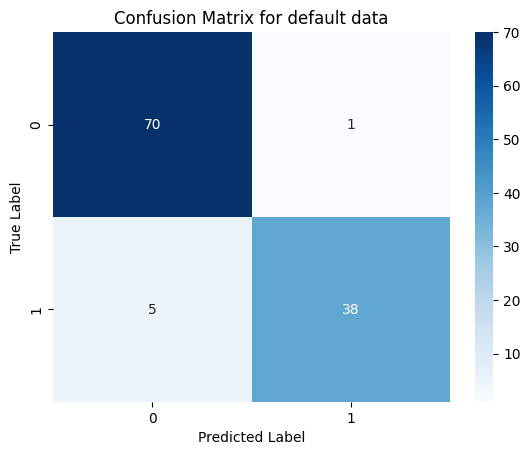

In [ ]:
#Default Results
X_train, X_test, y_train, y_test= train_test_split(X_default, y, test_size= 0.2, random_state = 42)

clf= DecisionTreeClassifier(criterion = "entropy", max_depth=5)
clf= clf.fit(X_train, y_train)
y_predict_= clf.predict(X_test)
accuracy_ = metrics.accuracy_score(y_test, y_predict_)
report_ = classification_report(y_test, y_predict_)
print("Scores for first data: \n" , report_)


print('Accuracy: ', accuracy_)
confusion_m = confusion_matrix(y_test, y_predict_)
p = sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for default data")

Scores for first data: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy:  0.9473684210526315


Text(0.5, 1.0, 'Confusion Matrix for first data')

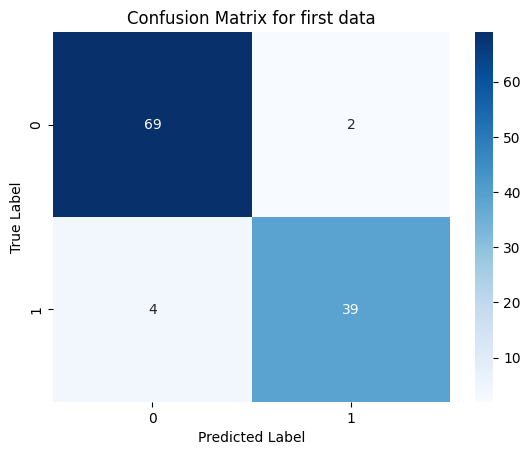

In [ ]:
#split first data
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y, test_size= 0.2, random_state = 42)

clf1= DecisionTreeClassifier(criterion = "entropy", max_depth=5)
clf1= clf1.fit(X_train1, y_train1)
y_predict1= clf1.predict(X_test1)
accuracy1 = metrics.accuracy_score(y_test1, y_predict1)
report1 = classification_report(y_test1, y_predict1)
print("Scores for first data: \n" , report1)


print('Accuracy: ', accuracy1)
confusion_m1 = confusion_matrix(y_test1, y_predict1)
p1 = sns.heatmap(pd.DataFrame(confusion_m1), annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for first data")

Scores for second data: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        71
           1       0.87      0.93      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Accuracy:  0.9210526315789473


Text(0.5, 1.0, 'Confusion Matrix for second data')

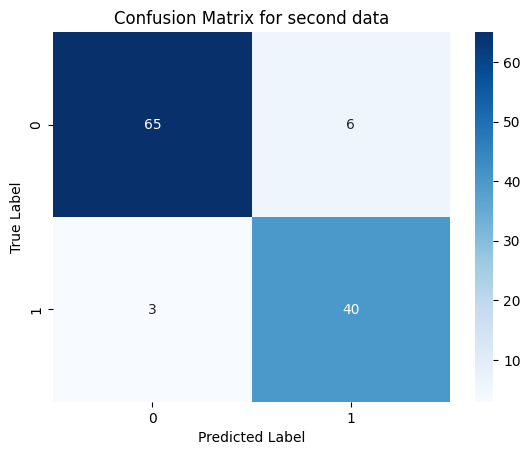

In [ ]:
#split second data
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y, test_size= 0.2, random_state = 42)
#Decission Tree Classifier
clf2 = DecisionTreeClassifier(criterion= "entropy", max_depth=5)

clf2= clf2.fit(X_train2, y_train2)
y_predict2= clf2.predict(X_test2)
accuracy2 = metrics.accuracy_score(y_test2, y_predict2)

report2 = classification_report(y_test2, y_predict2)
print("Scores for second data: \n" , report2)

print('Accuracy: ', accuracy2)
confusion_m2 = confusion_matrix(y_test2, y_predict2)
p2 = sns.heatmap(pd.DataFrame(confusion_m2), annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for second data")

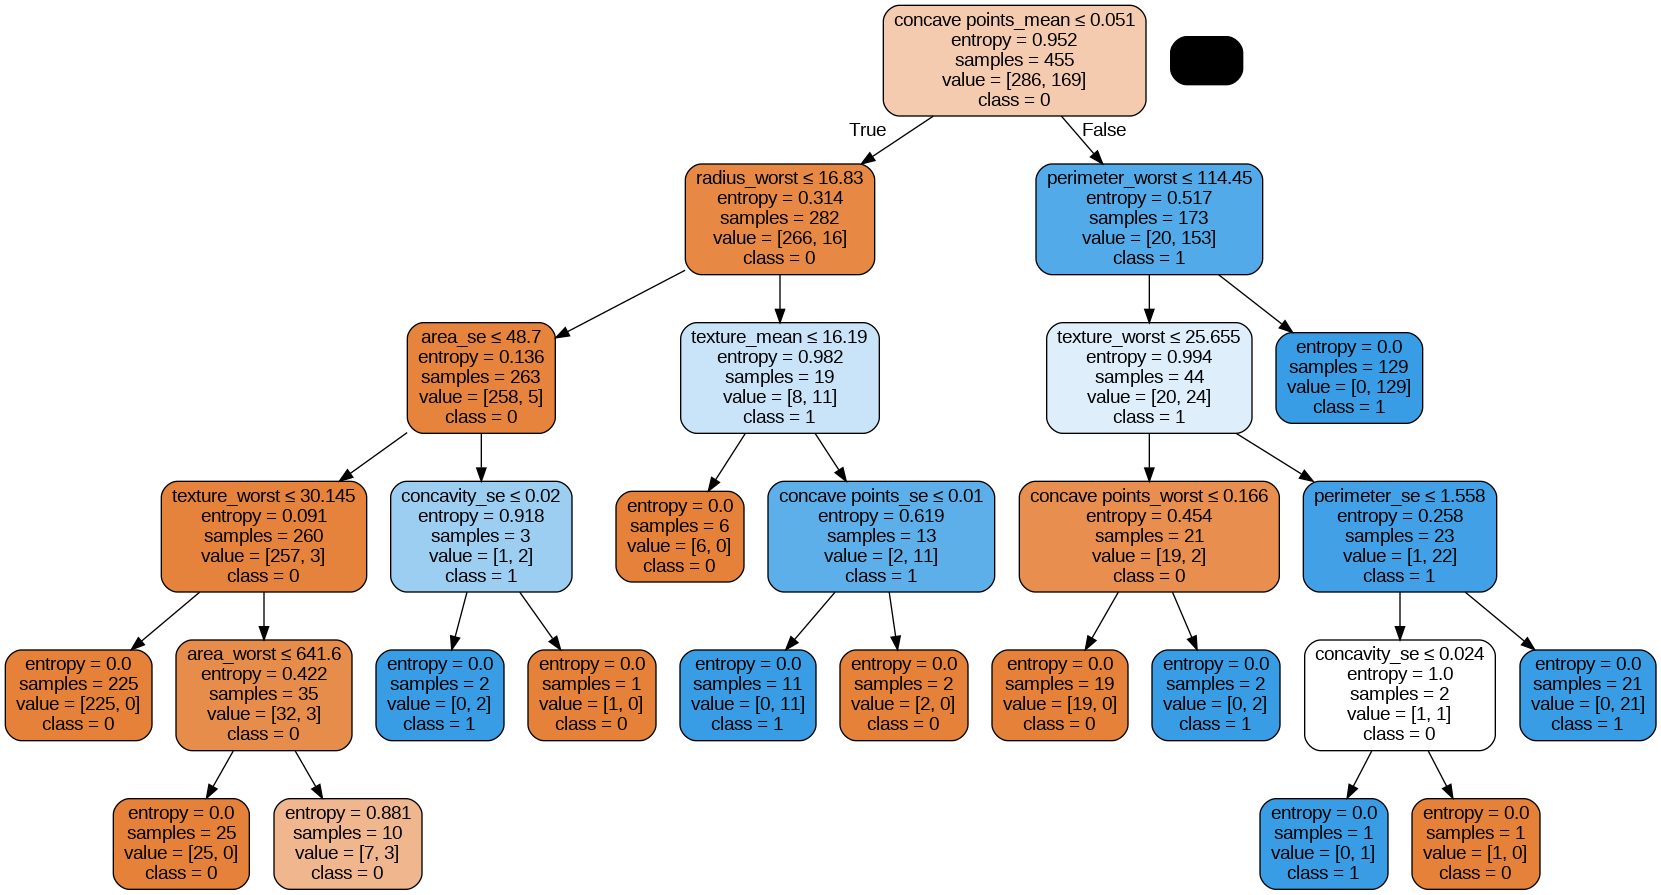

In [124]:
#visualize default data
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = default_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer.png')
Image(graph.create_png())

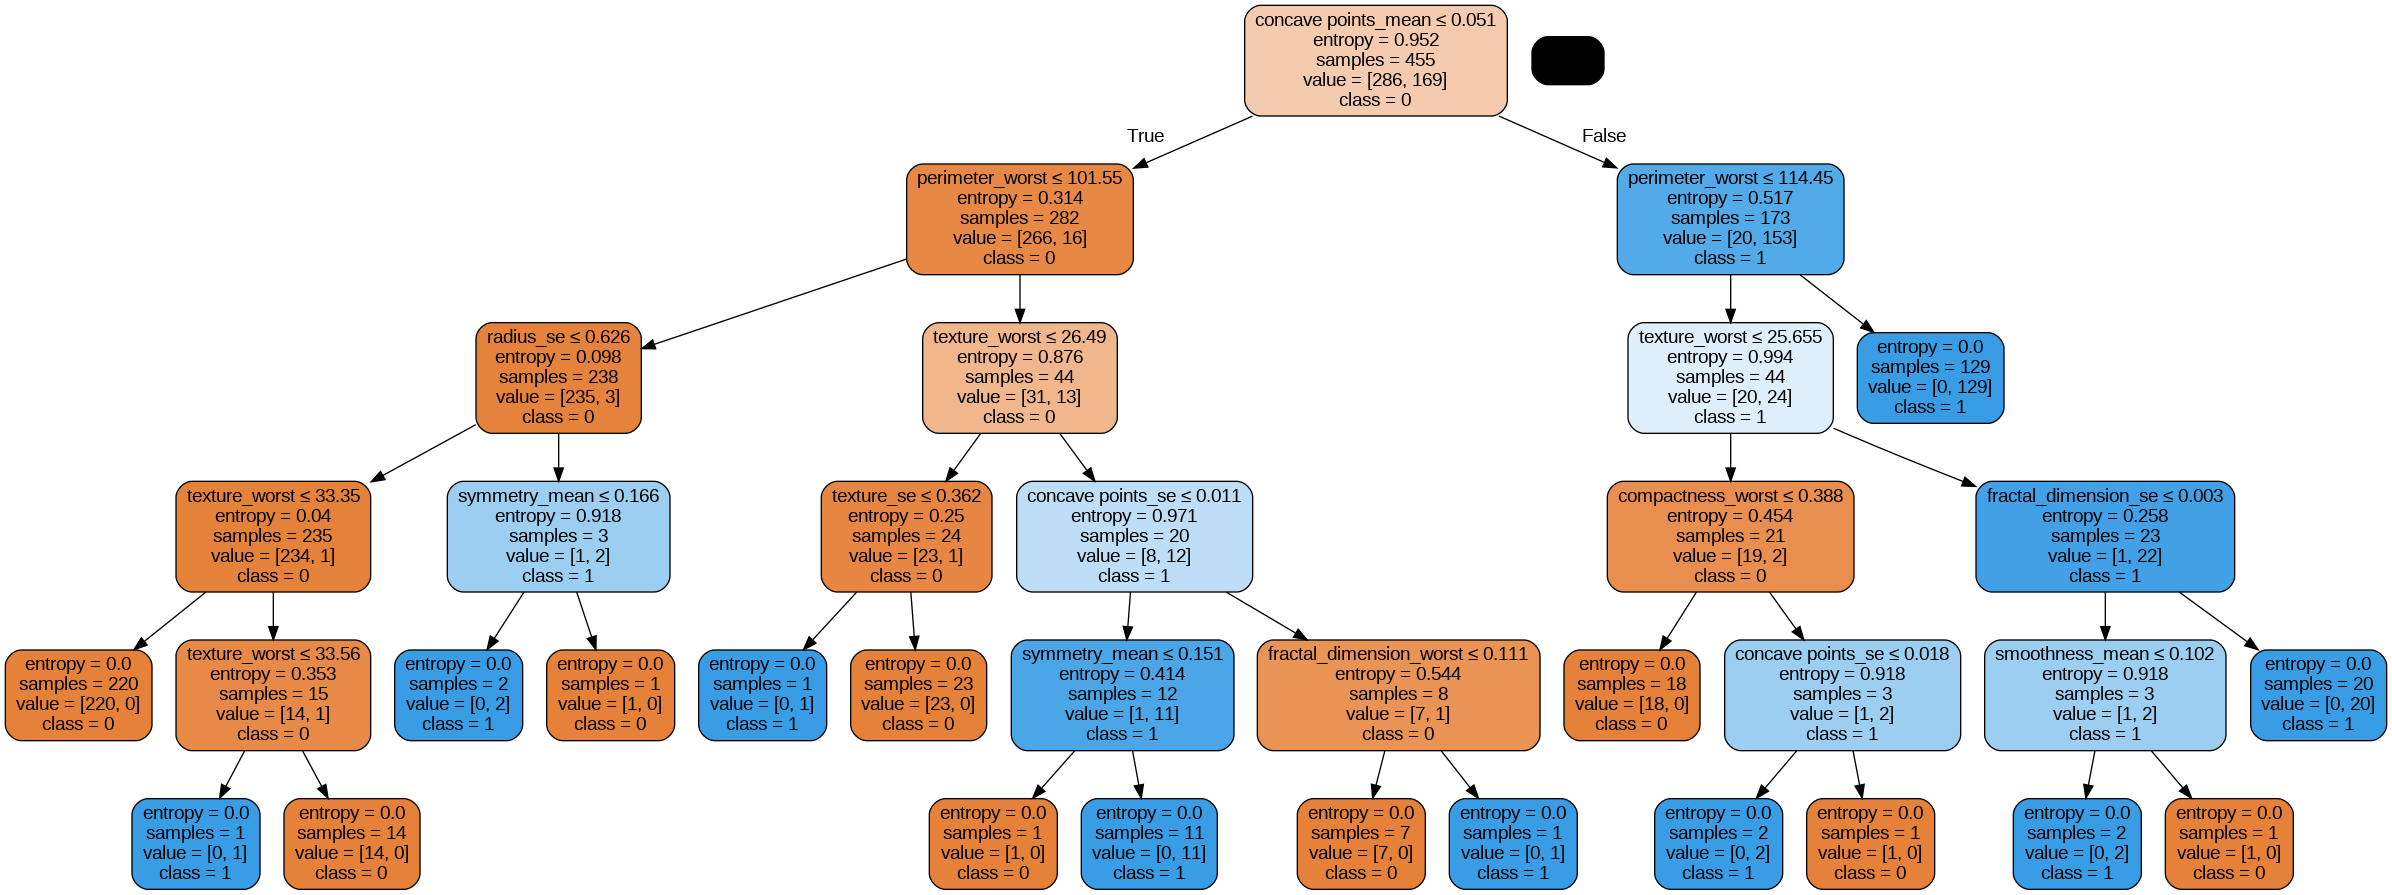

In [125]:
#visualize first desicion tree


dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols1, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer.png')
Image(graph.create_png())


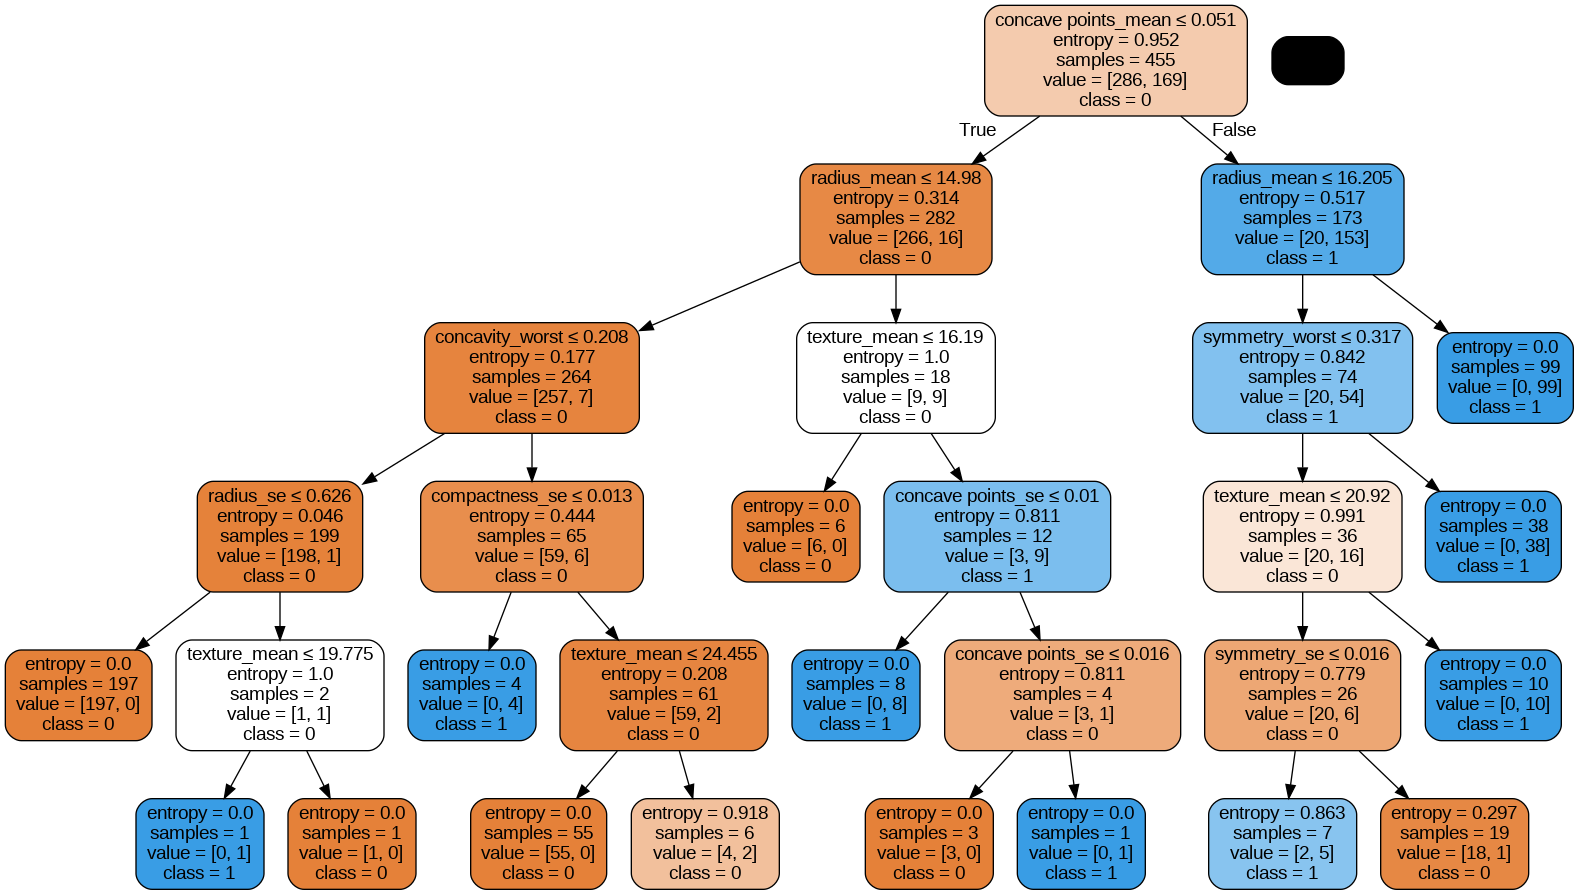

In [126]:
#visualize second decision tree

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols2, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer.png')
Image(graph.create_png())

# Test w Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler=StandardScaler()


Scores for first data: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy:  0.9736842105263158


Text(0.5, 1.0, 'Confusion Matrix for default data')

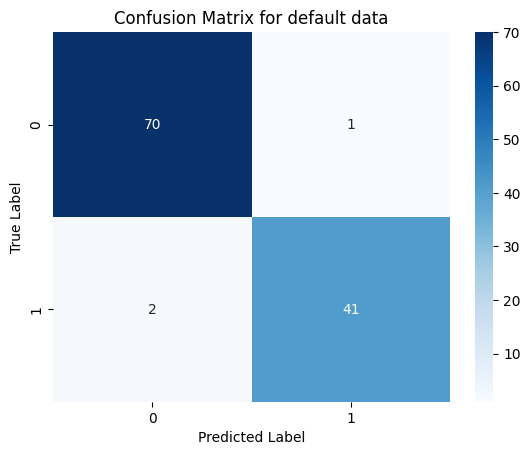

In [ ]:
#test for default data
X_train, X_test, y_train, y_test= train_test_split(X_default, y, test_size= 0.2, random_state = 42)
lr= LogisticRegression()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
report = classification_report(y_test, y_predict)
print("Scores for first data: \n" , report)


print('Accuracy: ', accuracy)
confusion_m = confusion_matrix(y_test, y_predict)
p1 = sns.heatmap(pd.DataFrame(confusion_m), annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for default data")


Scores for first data: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy:  0.9736842105263158


Text(0.5, 1.0, 'Confusion Matrix for first data')

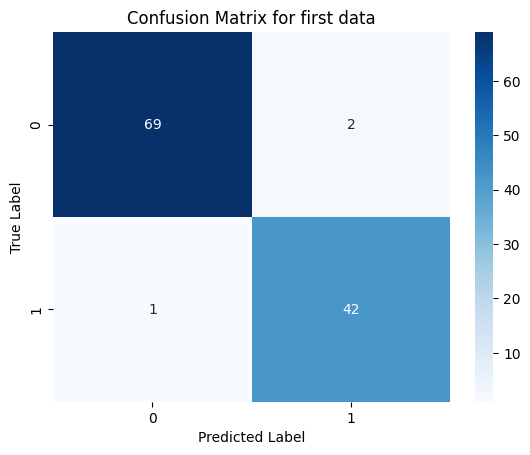

In [ ]:
#test for first data

X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y, test_size= 0.2, random_state = 42)
lr1= LogisticRegression()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

lr1.fit(X_train1, y_train1)
y_predict1 = lr1.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_predict1)
report1 = classification_report(y_test1, y_predict1)
print("Scores for first data: \n" , report1)


print('Accuracy: ', accuracy1)
confusion_m1 = confusion_matrix(y_test1, y_predict1)
p1 = sns.heatmap(pd.DataFrame(confusion_m1), annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for first data")

Scores for second data: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy:  0.9824561403508771


Text(0.5, 1.0, 'Confusion Matrix for second data')

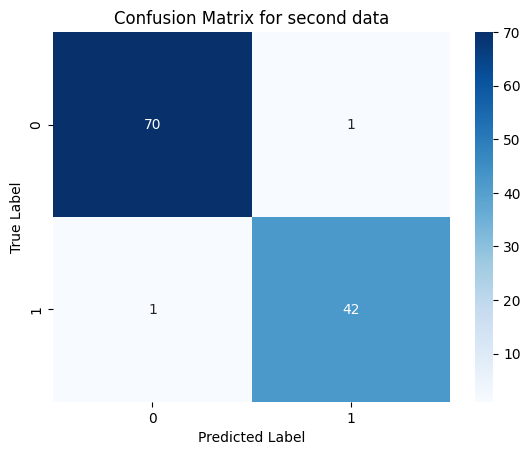

In [ ]:
#second data

X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y, test_size= 0.2, random_state = 42)
lr2= LogisticRegression()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)
lr2.fit(X_train2, y_train2)
y_predict2 = lr2.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_predict2)
report2 = classification_report(y_test2, y_predict2)
print("Scores for second data: \n" , report2)


print('Accuracy: ', accuracy2)
confusion_m2 = confusion_matrix(y_test2, y_predict2)
p2 = sns.heatmap(pd.DataFrame(confusion_m2), annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for second data")